**Assignment 1: Natural Language Processing**

Movie Review Sentiment Analysis

The goal of this assignment is to implement and compare three text classification algorithms—
Naive Bayes, Logistic Regression, and Multilayer Perceptron (MLP)—on the NLTK Movie Reviews
dataset. You will explore the impact of using both raw Term Frequency (TF) and Term Frequency-
Inverse Document Frequency (TF-IDF) as feature representations.

**1. Data Preparation**
- Load the NLTK Movie Reviews Dataset

In [4]:
import nltk
# Download the IMDb movie reviews dataset
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

**Access the Dataset**
- Once downloaded, we acess the data using the following code

In [5]:
from nltk.corpus import movie_reviews
# Access the movie reviews and labels
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]
# Shuffle the documents to ensure a balanced distribution of positive and negative reviews
import random
random.shuffle(documents)

**Explore the Dataset**
- Take a look at the structure of the dataset and sample reviews to understand its characteristics


In [6]:
# Print the first review and its label
print("Sample Review:", documents[0][0][:10]) # Displaying the first 10 words for brevity
print("Label:", documents[0][1])

Sample Review: ['talk', 'about', 'a', 'movie', 'that', 'seemed', 'dated', 'before', 'it', 'even']
Label: neg


Preprocess the dataset by tokenization (use nltk punkt tokenizer), stemming/lemmatization, and remove stopwords.

- I will use lemmatization here

In [8]:
import nltk
import random
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load and preprocess the data
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        raw_words = movie_reviews.raw(fileid)
        tokens = word_tokenize(raw_words)  # Tokenize using Punkt tokenizer
        tokens = [word.lower() for word in tokens if word.isalpha()]  # Lowercase and remove punctuation
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
        documents.append((tokens, category))

# Shuffle the documents
random.shuffle(documents)

# Display a sample
print("Sample Review:", documents[0][0][:10])
print("Label:", documents[0][1])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sample Review: ['bob', 'happy', 'bastard', 'quickie', 'review', 'rush', 'hour', 'problem', 'hour', 'clone']
Label: pos


**2. Coverage Analysis Insights**

- Conduct a coverage analysis to identify the percentage of unique words covered by the
preprocessing steps.

- Visualize the coverage analysis with the y-axis representing coverage percentage and the x-
axis representing the id of tokens (words) ordered by frequency of occurrence. Use a line plot
for clarity.

- Discuss the insights gained from the coverage analysis. Consider questions such as:

 - How does the coverage change with the number of tokens considered?

 - At what point does the coverage seem to stabilize?

 - Are there diminishing returns in terms of coverage as the number of tokens increases?

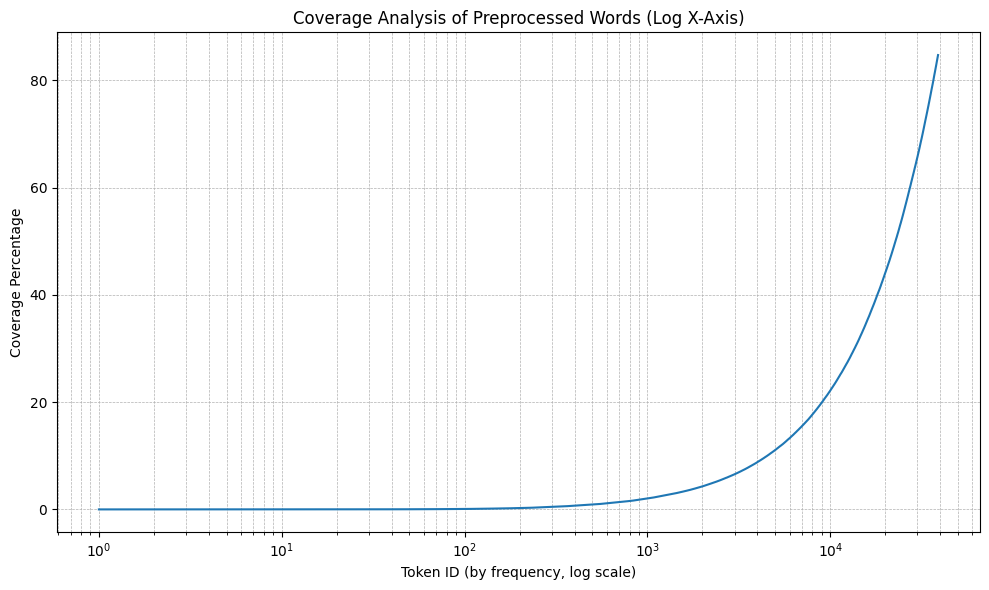

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Collect all raw words before preprocessing
all_words_raw = []
for fileid in movie_reviews.fileids():
    words = movie_reviews.words(fileid)
    all_words_raw.extend([word.lower() for word in words if word.isalpha()])

# Step 2: Extract all unique processed words from your existing documents
processed_words = [word for doc, _ in documents for word in doc]

# Step 3: Build vocabulary sets and word frequency
unique_raw_words = set(all_words_raw)
unique_processed_words = set(processed_words)
raw_word_freq = Counter(all_words_raw)
most_common_words = [word for word, _ in raw_word_freq.most_common()]

# Step 4: Compute coverage
coverage = []
covered_words = set()
for i, word in enumerate(most_common_words, 1):
    if word in unique_processed_words:
        covered_words.add(word)
    coverage.append(len(covered_words) / len(unique_raw_words) * 100)

#Step 5: Plot the coverage with log-scaled x-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(coverage) + 1), coverage)
plt.xscale("log")
plt.xlabel("Token ID (by frequency, log scale)")
plt.ylabel("Coverage Percentage")
plt.title("Coverage Analysis of Preprocessed Words (Log X-Axis)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Discussion**

How does the coverage change with the number of tokens considered?

The coverage starts out very flat. This is telling us that the most frequent words are not contributing a lot to the overall coverage of unique raw words. I think this is due to our stop words being removed during preprocessing. Our coverage starts to increase rapidly after several thousand tokens, where out less-dominant and content carrying words start to take over.

At what point does the coverage seem to stabilize?

In this plot, our coverage is flattened at around token 10,000.  

Are there diminishing returns in terms of coverage as the number of tokens increases?

There are diminishing returns, our stabilization is a good indicator of this. The log-scaled plot reveals a long tail distribution. At first, our gains in coverage are very low because we removed stop words, and then we hit a sharp increase as our mid-frequency words are added. This confirms our Zipfian's law where a small number of middle of the pack words will cary most of the load.

**Rationalization for Vocablary Choice**

- Discuss the rationale for choosing a specific vocabulary size for modeling. Consider factors
such as:

 - The trade-off between a larger vocabulary (more words) and computational efficiency.

 - The impact of rare or very common words on the model's generalization.

 - The need to balance informativeness and model complexity.

 - Any specific considerations for the chosen algorithms (Naive Bayes, Logistic Regression,
MLP) in terms of vocabulary size

Selecting the proper vocabulary size is important to have an efficient and working NLP model. Selecting a large number of vocabulary allows our model to capture more nuance and more rare words which may be helpful if we are working with a specialized topic. However, using a large vocabulary will lead to high memory usave and slower training. Depending on available computational power and your dataset, you have to make a choice and tradeoff. I will try use a cutoff rate that covers around 90%-95% of vocab.

As stated above, rare words may be important and helpful if working in a specialized area. There is a possibility that some very rare words are noise, such as typos. There is also some risk of overfitting with rare words. As for our very common words, there should be little impact because they are often stop words which we will have removed. We can filter our very high frequency and very low frequency words to reduce noise and possible overfitting.

Balancing our informativeness and complexity is also something to consider. Having low vocab will simplify our features, and also be very generalized. However, using very low vocab may lose some important data needed for classification. Our goal is to capture the mid-frequency zone as shown in the plot above.

Finally, taking algorithms into consideration. Naive Bayes performs well with large vocabularies due to its independence assumption. Logistic Regression is very sensitive when it comes to dimensions. And MLP or a neural net with high dimensional inputs will increase the weight matrix size. We need to limit the size of our vocab to balance the model's complexity along with its training time.
